# Learning about the Fast Fourier Transform. See what frequency components make up a signal!

Import heartbeat data from PASCO -- 

This is a working version using pandas. 

fft is simpler when using arrays of data (vs staying in dataframes). 

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm
# from matplotlib import interactive
%matplotlib nbagg

In [2]:
# load data file
df = pd.read_csv('2018_02 RPS heartbeat.csv',skiprows=1)
df

,Date and Time,Time (s),Voltage (mV),Heart Rate (beats/min)
0,02/13/2018 10:35:01 am,0.000,0.000,NaN
1,02/13/2018 10:35:01 am,0.005,0.000,NaN
2,02/13/2018 10:35:01 am,0.010,0.000,NaN
3,02/13/2018 10:35:01 am,0.015,0.000,NaN
4,02/13/2018 10:35:01 am,0.020,0.000,NaN
...,...,...,...,...
7466,02/13/2018 10:35:38 am,37.330,0.660,NaN
7467,02/13/2018 10:35:38 am,37.335,0.557,NaN
7468,02/13/2018 10:35:38 am,37.340,0.464,NaN
7469,02/13/2018 10:35:38 am,37.345,0.552,NaN


In [3]:
# define key variables:

df.index = df['Time (s)']
time_sec = df['Time (s)']
voltage_mV = df['Voltage (mV)']  #.astype(float)
df.index

Float64Index([   0.0,  0.005,   0.01,  0.015,   0.02,  0.025,   0.03,  0.035,
                0.04,  0.045,
              ...
              37.305,  37.31, 37.315,  37.32, 37.325,  37.33, 37.335,  37.34,
              37.345,  37.35],
             dtype='float64', name='Time (s)', length=7471)

In [4]:
# just a note in case loading file isn't working easily:

# sometimes required to force data to be a float...
# time_sec = df['Run #1.1'].astype(float)
# voltage_mV = df['Run #1.2'].astype(float)

In [5]:
#plot the raw signal

voltage_mV.plot()
plt.ylabel('signal (mV)')
plt.xlabel('time (sec)')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


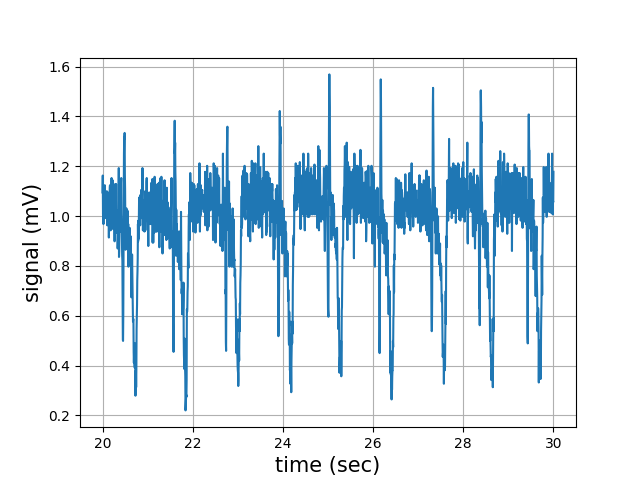

In [6]:
# Define a region of interest (ROI)

start_time, stop_time = 20, 30

# start_time_idx = np.where(time_sec > start_time)[0][0]
# stop_time_idx = np.where(time_sec > stop_time)[0][0]
# x_ROI = df.index[start_time_idx:stop_time_idx]
# y_ROI = voltage_mV[start_time_idx:stop_time_idx]

x_ROI = time_sec[start_time:stop_time]
y_ROI = voltage_mV[start_time:stop_time]

# plt.plot(x_ROI,y_ROI)  # this works too
y_ROI.plot() 
plt.grid()
plt.xlabel('time (sec)',fontsize=15)
plt.ylabel('signal (mV)',fontsize=15)
plt.show()

In [7]:
# Let's take the Fourier Transform to learn about the frequency components that make up this signal:

# substract the average so there's no DC component:
Y_modified = y_ROI - np.mean(y_ROI)

# take the FFT
Y_FFT = np.fft.fft(Y_modified)

# power spectrum is abs value squared:
y2 = np.abs(Y_FFT * np.conjugate(Y_FFT))


<IPython.core.display.Javascript object>


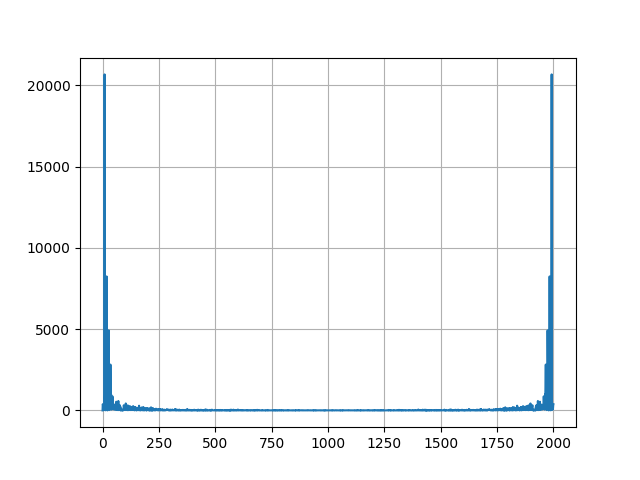

In [8]:
# let's see what we have:
plt.plot(y2)
plt.grid()
plt.show()

Strange! Zooming in, we see that there are two mirror copies of the power spectrum. This is actually the way that FFT correctly computes the power spectrum. We might be more interested in just observing half of this...

In [9]:
Y_modified = y_ROI - np.mean(y_ROI)
Y_FFT = np.fft.fft(Y_modified)
y2 = Y_FFT * np.conjugate(Y_FFT)
power_spectrum = abs(y2[0:len(Y_FFT)//2] + y2[:len(Y_FFT)//2:-1])
DT = df.index[1]-df.index[0]   # sample time
freq = np.fft.fftfreq(len(y_ROI),d=DT)[0:len(power_spectrum)]


<IPython.core.display.Javascript object>


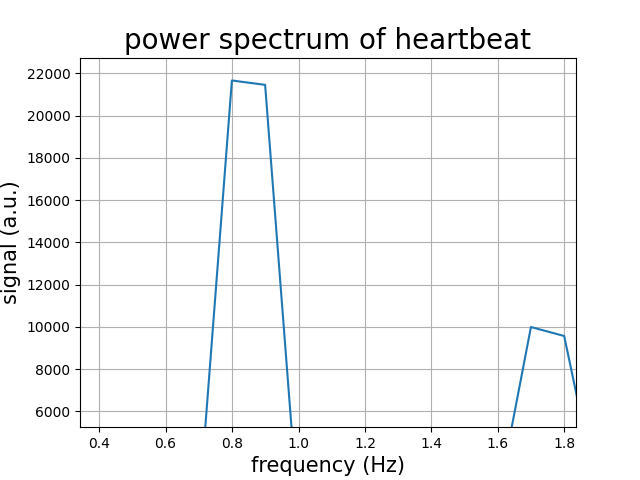

In [15]:
plt.plot(freq,power_spectrum)
plt.xlim([0,10])
# plt.ylim([0,2e2])
title = 'power spectrum of heartbeat'
xaxis_label = 'frequency (Hz)'
yaxis_label = 'signal (a.u.)'

plt.xlabel(xaxis_label,fontsize=15)
plt.ylabel(yaxis_label,fontsize=15)
plt.grid()
plt.title(title,fontsize=20)
plt.show()

What can you learn from looking at the power spectrum?

Easy to determine heart rate -- that is the fundamental frequency (the lowest frequency part of the signal that repeats) -- and we can turn it into bpm by multiplying by 60 sec/min --> 0.845 Hz * 60 = 50.7 bpm. Good resting heart rate!

We can also see that there are harmonics, or frequencies above the fundamental. Harmonics are what make one repeating signal different from another, and what makes a tuba sound different than a trumpet.


This is effectively the end of the tutorial on FFT.

<IPython.core.display.Javascript object>


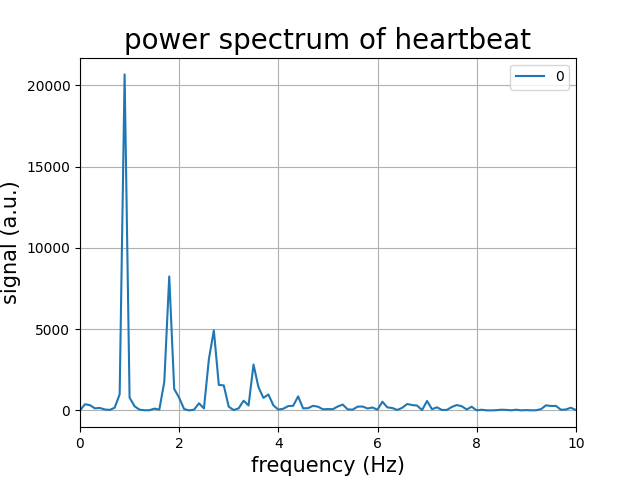

/usr/local/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'power spectrum of heartbeat')

In [11]:
# By the way, we can also keep the data as a dataframe if desired:
Yf = np.fft.rfft(y_ROI - np.mean(y_ROI))
fft_power = pd.DataFrame(Yf * np.conjugate(Yf))

# fft_power = pd.DataFrame(np.abs(np.fft.rfft(y_ROI - np.mean(y_ROI)))**2)
DT = df.index[1]-df.index[0]   # sample time
fft_power.index=(np.fft.fftfreq(y_ROI.shape[0])/DT)[0:len(fft_power)]
fft_power.plot()
plt.xlim([0,10])
# plt.plot(freq,power_spectrum)
title = 'power spectrum of heartbeat'
xaxis_label = 'frequency (Hz)'
yaxis_label = 'signal (a.u.)'

plt.xlabel(xaxis_label,fontsize=15)
plt.ylabel(yaxis_label,fontsize=15)
plt.grid()
plt.title(title,fontsize=20)
# plt.ylim([0,2e2])
# https://stackoverflow.com/questions/43412073/how-do-i-plot-the-output-of-numpy-fft-in-bins

It does look slightly different, but I suspect it's an issue of the precise way in which the signal is sampled.

Here's a bonus thing: If you want to make it so that you can easily see whether the function is dipping above or below a value, try shading:

In [13]:
fig, ax = plt.subplots()
ax.plot(y_ROI)
# y_ROI.plot()
plt.xlabel('time (sec)',fontsize=15)
plt.ylabel('signal (mV)',fontsize=15)
plt.grid()   
ax.fill_between(x_ROI, np.mean(y_ROI),y_ROI,
                where=y_ROI >= np.mean(y_ROI),
                facecolor='green', alpha=0.2, interpolate=True)
ax.fill_between(x_ROI, np.mean(y_ROI),y_ROI,
                where=y_ROI < np.mean(y_ROI),
                facecolor='red', alpha=0.2, interpolate=True)
# ax.fill_between(df.index, -1,df['accelerometerAccelerationZ(G)'],
#                 where=df['accelerometerAccelerationZ(G)'] < -1,
#                 facecolor='red', alpha=0.2, interpolate=True)
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


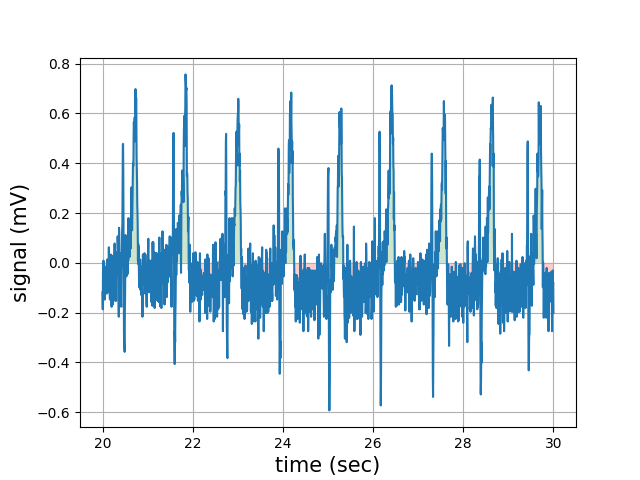

In [14]:
y_ROI_flipped = -(y_ROI - np.mean(y_ROI))


fig, ax = plt.subplots()
ax.plot(x_ROI,y_ROI_flipped)
# y_ROI.plot()
plt.xlabel('time (sec)',fontsize=15)
plt.ylabel('signal (mV)',fontsize=15)
plt.grid()    
ax.fill_between(x_ROI, np.mean(y_ROI_flipped),y_ROI_flipped,
                where=y_ROI_flipped >= np.mean(y_ROI_flipped),
                facecolor='green', alpha=0.2, interpolate=True)
ax.fill_between(x_ROI, np.mean(y_ROI_flipped),y_ROI_flipped,
                where=y_ROI_flipped < np.mean(y_ROI_flipped),
                facecolor='red', alpha=0.2, interpolate=True)
plt.show()